In [253]:
import numpy as np
#import cv2
#from PIL import Image
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from skimage import io

(512, 512, 3)


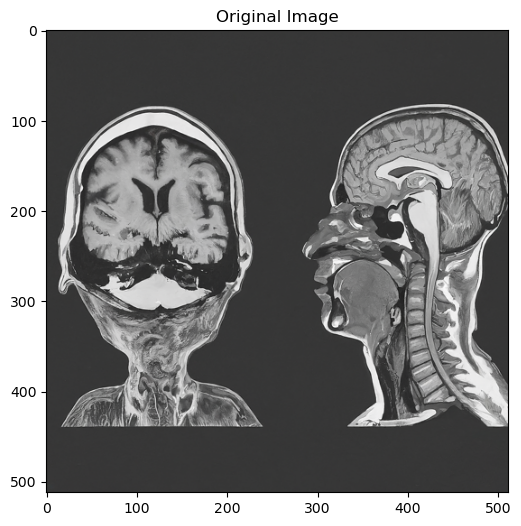

In [254]:
# Load image
img = io.imread('brain.png')
print(img.shape)

# Display the original image
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.title("Original Image")
plt.show()

In [255]:
# Normalize image
img = img / 255.0  # Normalize pixel values

# Reshape the image to be a list of RGB pixels
pixels = img.reshape(-1, 3)

# Fit KMeans on the pixel data
kmeans = KMeans(n_clusters=5).fit(pixels)

# Define colors for each cluster
colors = [
    [255, 0, 0],  # Red
    [0,0,0],      # Black
    [0, 255, 0],  # Green
    [0, 0, 255],  # Blue
    [255, 255, 0] # Yellow
]

# Apply the colors to the image based on cluster labels
segmented_img = np.zeros_like(pixels)
for i in range(len(pixels)):
    segmented_img[i] = colors[kmeans.labels_[i]]

# Replace each pixel with its centroid
#segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(img.shape)

C:\Users\raoji\miniconda3\envs\torch2\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


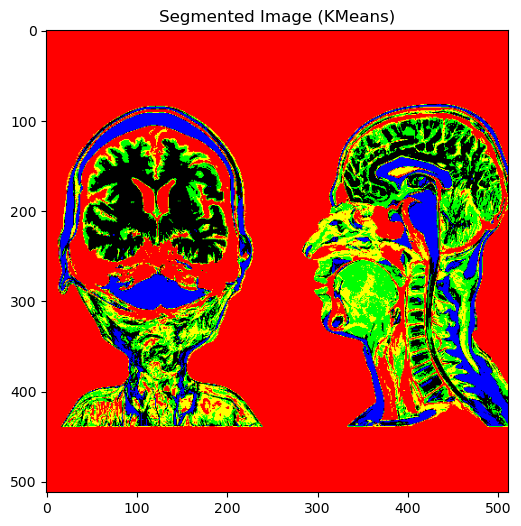

In [256]:
# Display the segmented image
plt.figure(figsize=(6,6))
plt.imshow(segmented_img)
plt.title("Segmented Image (KMeans)")
plt.show()